Load library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import json

Load Dataset

In [3]:
data_raw = pd.read_csv('house_prices.csv')
pd.set_option('display.max_columns', None)
data_raw.head(2)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN


Assessing Data and Cleaning Data

In [4]:
df = data_raw.copy()

In [5]:
df.drop(['Index', 'Amount(in rupees)', 'Title', 'Description', 'Ownership', 'Floor', 'Dimensions', 'Plot Area', 'Status'], axis='columns', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Price (in rupees)  169866 non-null  float64
 1   location           187531 non-null  object 
 2   Carpet Area        106858 non-null  object 
 3   Transaction        187448 non-null  object 
 4   Furnishing         184634 non-null  object 
 5   facing             117298 non-null  object 
 6   overlooking        106095 non-null  object 
 7   Society            77853 non-null   object 
 8   Bathroom           186703 non-null  object 
 9   Balcony            138596 non-null  object 
 10  Car Parking        84174 non-null   object 
 11  Super Area         79846 non-null   object 
dtypes: float64(1), object(11)
memory usage: 17.2+ MB


In [7]:
df.head()

,Price (in rupees),location,Carpet Area,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Super Area
0,6000.0,thane,500 sqft,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN
1,13799.0,thane,473 sqft,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,NaN
2,17500.0,thane,779 sqft,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,NaN
3,NaN,thane,530 sqft,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN
4,18824.0,thane,635 sqft,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,NaN


In [8]:
missing_value = df.isna().sum()
missing_value[missing_value > 0]

Price (in rupees)     17665
Carpet Area           80673
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Super Area           107685
dtype: int64

In [9]:
categorical_features = df.select_dtypes(include=['object']).columns

for column in categorical_features:
  df[column] = df[column].fillna(df[column].mode()[0])

In [10]:
df['Balcony'] = df['Balcony'].str.replace('> 10', '11')
df['Balcony'] = df['Balcony'].astype('int')

In [11]:
df['Bathroom'] = df['Bathroom'].str.replace('> 10', '11')
df['Bathroom'] = df['Bathroom'].astype('int')

In [12]:
numerical_features = ['Price (in rupees)', 'Balcony', 'Bathroom']
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

In [13]:
df.head()

,Price (in rupees),location,Carpet Area,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Super Area
0,6000.0,thane,500 sqft,Resale,Unfurnished,East,Main Road,Srushti Siddhi Mangal Murti Complex,1,2,1 Covered,1100 sqft
1,13799.0,thane,473 sqft,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,2,1 Open,1100 sqft
2,17500.0,thane,779 sqft,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,2,1 Covered,1100 sqft
3,6034.0,thane,530 sqft,Resale,Unfurnished,East,Main Road,Hamdam Apartment,1,1,1 Covered,1100 sqft
4,18824.0,thane,635 sqft,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,2,1 Covered,1100 sqft


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Price (in rupees)  187531 non-null  float64
 1   location           187531 non-null  object 
 2   Carpet Area        187531 non-null  object 
 3   Transaction        187531 non-null  object 
 4   Furnishing         187531 non-null  object 
 5   facing             187531 non-null  object 
 6   overlooking        187531 non-null  object 
 7   Society            187531 non-null  object 
 8   Bathroom           187531 non-null  int32  
 9   Balcony            187531 non-null  int32  
 10  Car Parking        187531 non-null  object 
 11  Super Area         187531 non-null  object 
dtypes: float64(1), int32(2), object(9)
memory usage: 15.7+ MB


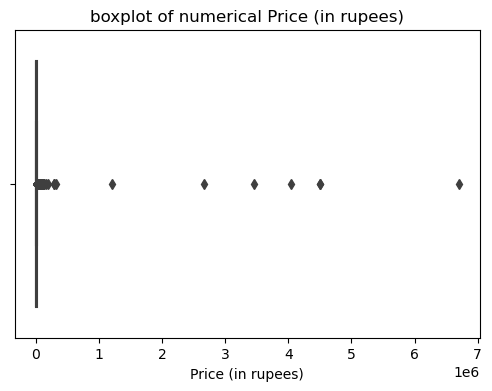

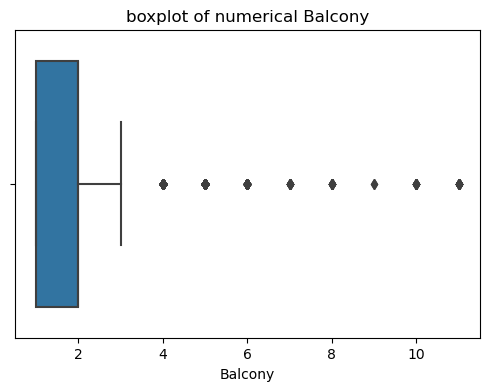

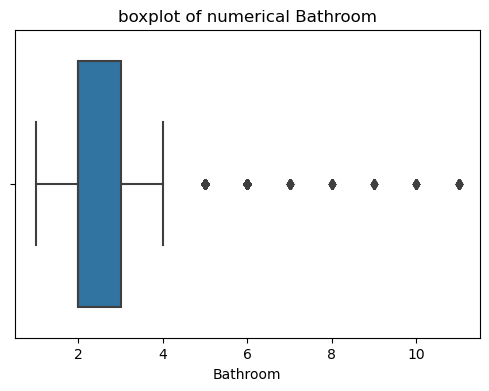

In [15]:
for feature in numerical_features:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df[feature])
  plt.title(f'boxplot of numerical {feature}')
  plt.show()

In [16]:
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

In [17]:
condition = ~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numerical_features]

categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

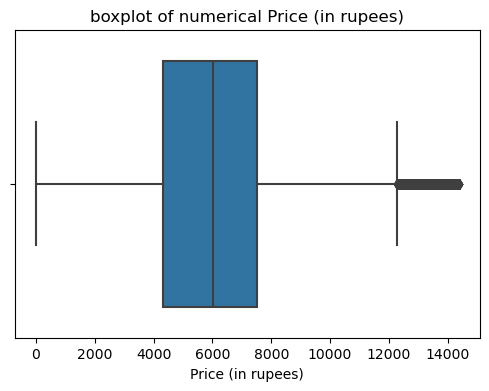

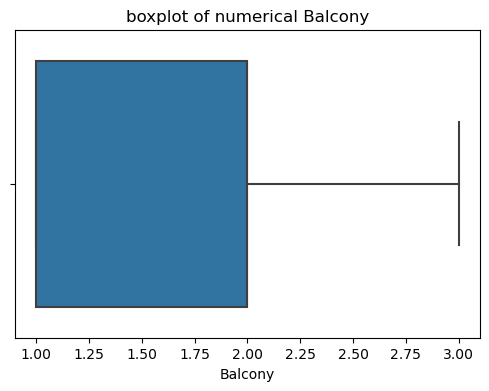

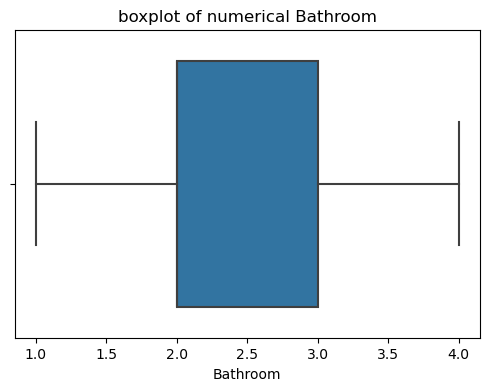

In [18]:
for feature in numerical_features:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df[feature])
  plt.title(f'boxplot of numerical {feature}')
  plt.show()

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


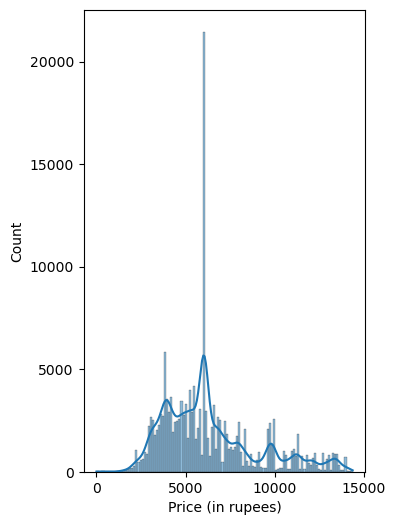

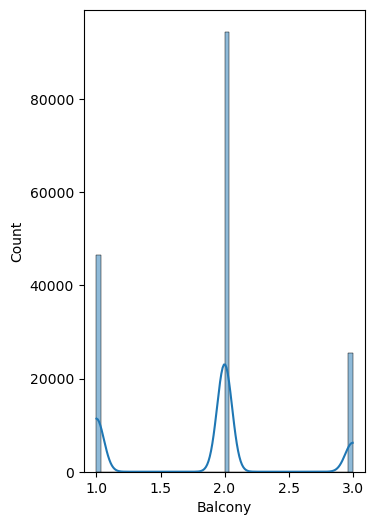

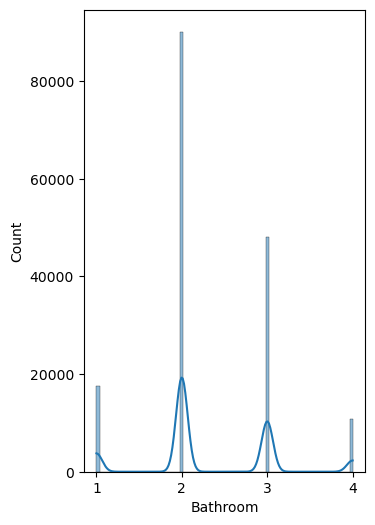

In [19]:
for features in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(df[features], kde=True)

In [20]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


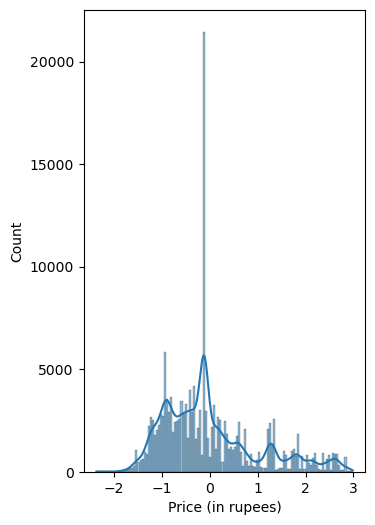

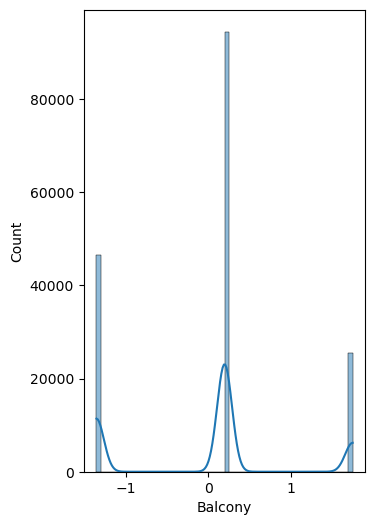

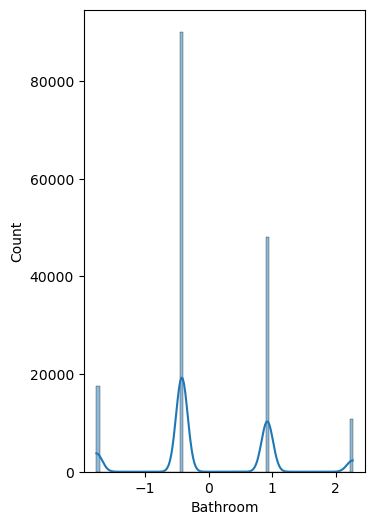

In [21]:
for features in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(df[features], kde=True)

In [22]:
le = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for column in categorical_features:
  df_lencoder[column] = le.fit_transform(df_lencoder[column])

df_lencoder

,Price (in rupees),Balcony,Bathroom,location,Carpet Area,Transaction,Furnishing,facing,overlooking,Society,Car Parking,Super Area
0,-0.128233,0.197336,-1.762841,67,1755,3,2,0,6,7960,0,128
1,2.768999,0.197336,-0.420021,67,1720,3,1,0,0,2030,2,128
3,-0.115603,-1.352385,-1.762841,67,1795,3,2,0,6,2953,0,128
5,0.101346,-1.352385,-1.762841,67,5,3,2,0,1,9100,0,2246
6,-1.414324,0.197336,-1.762841,67,1822,3,2,0,6,2953,0,128
...,...,...,...,...,...,...,...,...,...,...,...,...
187525,-0.906871,0.197336,0.922800,80,69,0,2,2,1,5528,0,128
187526,-1.159112,1.747057,0.922800,80,5,0,1,0,0,1349,0,1083
187527,-1.140909,0.197336,0.922800,80,5,3,2,2,1,8208,0,807
187528,-0.743788,0.197336,0.922800,80,329,3,0,0,1,1349,1,128


Exploratory Data Analysis Process

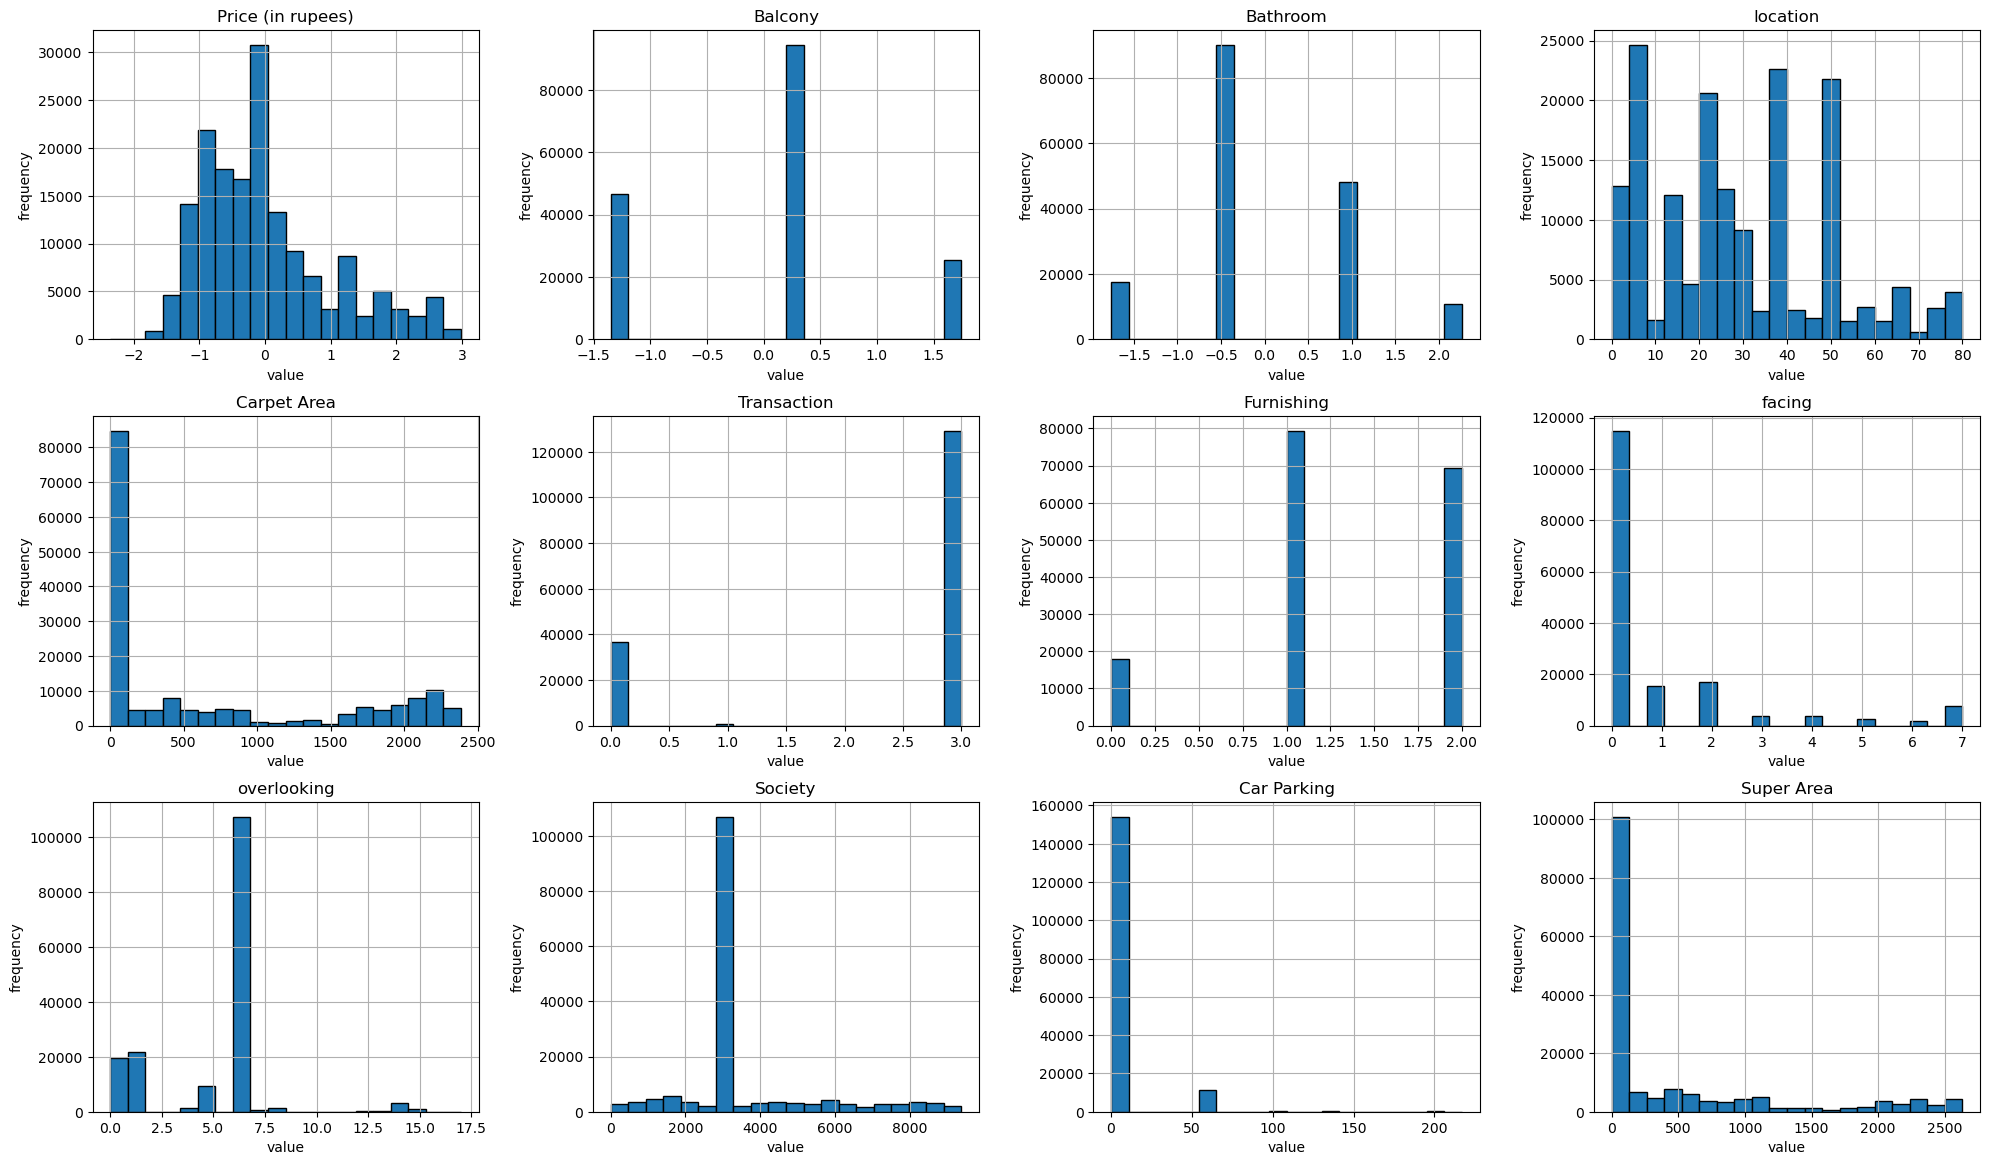

In [23]:
num_var = df_lencoder.shape[1]
n_cols = 4
n_rows = -(-num_var // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
plt.title('Distribution of Variabel')
axes = axes.flatten()


for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

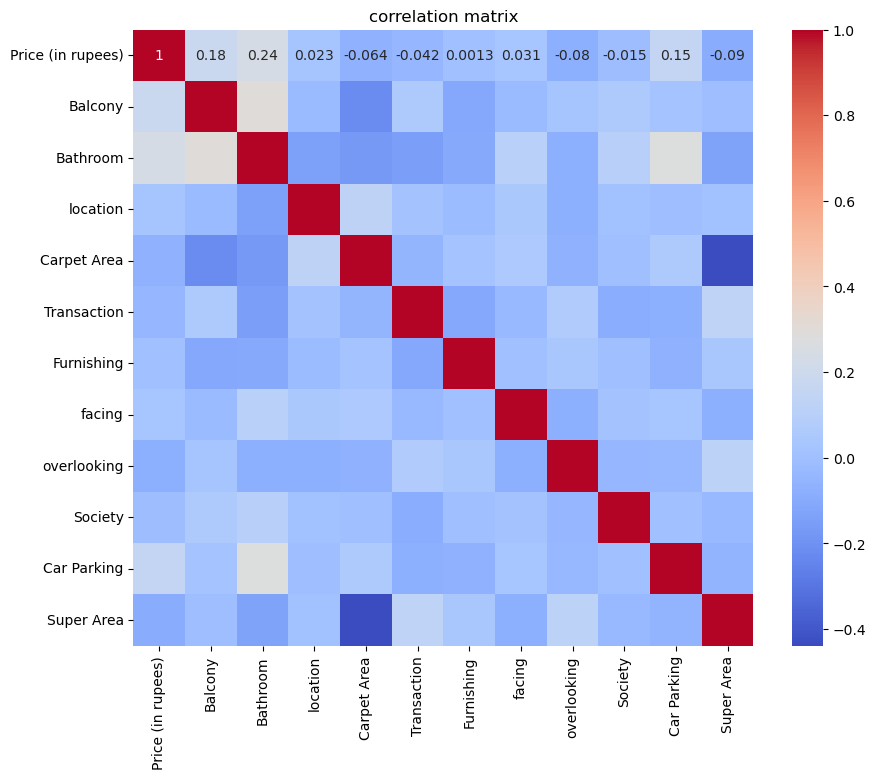

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_lencoder.corr(), annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [25]:
corre = df_lencoder.corr()
corre = corre['Price (in rupees)'].drop(['Price (in rupees)'])
corre.abs().sort_values(ascending=False)

Bathroom       0.235974
Balcony        0.181058
Car Parking    0.151775
Super Area     0.090230
overlooking    0.080428
Carpet Area    0.063679
Transaction    0.042103
facing         0.031465
location       0.022866
Society        0.015468
Furnishing     0.001263
Name: Price (in rupees), dtype: float64

Data Splitting

In [26]:
x = df_lencoder.drop(columns=['Price (in rupees)'])
y = df_lencoder['Price (in rupees)']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [28]:
print('jumlah data', len(x))
print('********************')
print('jumlah data latih', len(x_train))
print('********************')
print('jumlah data tes', len(x_test))

jumlah data 166559
********************
jumlah data latih 133247
********************
jumlah data tes 33312


In [29]:

model_1 = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

model_2 = LinearRegression().fit(x_train, y_train)

model_3 = GradientBoostingRegressor(random_state=184)
model_3.fit(x_train, y_train)

GradientBoostingRegressor(random_state=184)

Evaluasi Model

In [30]:
predict_model1 = model_1.predict(x_test)
mae_model1 = mean_absolute_error(y_test, predict_model1)
mse_model1 = mean_squared_error(y_test, predict_model1)
r2_model1 = r2_score(y_test, predict_model1)

data = {
    'MAE' : [mae_model1],
    'MSE' : [mse_model1],
    'R2' : [r2_model1]
}

df_results = pd.DataFrame(data, index=['model1_LAR'])
df_results

,MAE,MSE,R2
model1_LAR,0.772661,1.002114,0.001465


In [31]:
predict_model2 = model_2.predict(x_test)
mae_model2 = mean_absolute_error(y_test, predict_model2)
mse_model2 = mean_squared_error(y_test, predict_model2)
r2_model2 = r2_score(y_test, predict_model2)

df_results.loc['model2_LR'] = [mae_model2, mse_model2, r2_model2]
df_results

,MAE,MSE,R2
model1_LAR,0.772661,1.002114,0.001465
model2_LR,0.734802,0.905343,0.097891


In [32]:
predict_model3 = model_3.predict(x_test)
mae_model3 = mean_absolute_error(y_test, predict_model3)
mse_model3 = mean_squared_error(y_test, predict_model3)
r2_model3 = r2_score(y_test, predict_model3)

df_results.loc['model3_GBR'] = [mae_model3, mse_model3, r2_model3]
df_results

,MAE,MSE,R2
model1_LAR,0.772661,1.002114,0.001465
model2_LR,0.734802,0.905343,0.097891
model3_GBR,0.471988,0.403975,0.597468


The third model approach above the Gradient Boosting Regressor model is the best model for this project

In [33]:
joblib.dump(model_3, 'gbr_model.joblib')

['gbr_model.joblib']

In [35]:
x_test.to_json('data.json', orient='split', compression='infer')

This json file serves to create test data that is used to predict using the FLask API